<a href="https://colab.research.google.com/github/2403a54124-ux/NLP-NATURAL-LANGUAGE-PROCESS-/blob/main/Lab_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Required Libraries
import pandas as pd
import spacy
from spacy.matcher import Matcher
from collections import Counter
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download Required NLTK Resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv(
     '/content/arxiv_data_210930-054931.csv',
      engine='python',
    nrows=1000
)

print(df.head())

                           terms  \
0                      ['cs.LG']   
1             ['cs.LG', 'cs.AI']   
2  ['cs.LG', 'cs.CR', 'stat.ML']   
3             ['cs.LG', 'cs.CR']   
4                      ['cs.LG']   

                                              titles  \
0  Multi-Level Attention Pooling for Graph Neural...   
1  Decision Forests vs. Deep Networks: Conceptual...   
2  Power up! Robust Graph Convolutional Network v...   
3  Releasing Graph Neural Networks with Different...   
4  Recurrence-Aware Long-Term Cognitive Network f...   

                                           abstracts  
0  Graph neural networks (GNNs) have been widely ...  
1  Deep networks and decision forests (such as ra...  
2  Graph convolutional networks (GCNs) are powerf...  
3  With the increasing popularity of Graph Neural...  
4  Machine learning solutions for pattern classif...  


In [ ]:
#Word Tokenization (NLTK)
# nltk.download("punkt_tab") # This line is not needed as 'punkt' was already downloaded
df["tokenized_abstracts"] = df["abstracts"].apply(word_tokenize)
df["tokenized_abstracts"].head()

,tokenized_abstracts
0,"[Graph, neural, networks, (, GNNs, ), have, be..."
1,"[Deep, networks, and, decision, forests, (, su..."
2,"[Graph, convolutional, networks, (, GCNs, ), a..."
3,"[With, the, increasing, popularity, of, Graph,..."
4,"[Machine, learning, solutions, for, pattern, c..."


In [ ]:
#Word Tokenization (NLTK)
df["tokenized_abstracts"] = df["abstracts"].apply(word_tokenize)
df["tokenized_abstracts"].head()

,tokenized_abstracts
0,"[Graph, neural, networks, (, GNNs, ), have, be..."
1,"[Deep, networks, and, decision, forests, (, su..."
2,"[Graph, convolutional, networks, (, GCNs, ), a..."
3,"[With, the, increasing, popularity, of, Graph,..."
4,"[Machine, learning, solutions, for, pattern, c..."


In [16]:
# Stopword Removal (NLTK)
stop_words = set(stopwords.words("english"))

df["filtered_abstracts"] = df["tokenized_abstracts"].apply(
    lambda words: [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]
)

df["filtered_abstracts"].head()

,filtered_abstracts
0,"[graph, neural, networks, gnns, widely, used, ..."
1,"[deep, networks, decision, forests, random, fo..."
2,"[graph, convolutional, networks, gcns, powerfu..."
3,"[increasing, popularity, graph, neural, networ..."
4,"[machine, learning, solutions, pattern, classi..."


In [18]:
#Lemmatization (NLTK)
lemmatizer = WordNetLemmatizer()

df["lemmatized_abstracts"] = df["filtered_abstracts"].apply(
    lambda words: [lemmatizer.lemmatize(w) for w in words]
)

df["lemmatized_abstracts"].head()

,lemmatized_abstracts
0,"[graph, neural, network, gnns, widely, used, l..."
1,"[deep, network, decision, forest, random, fore..."
2,"[graph, convolutional, network, gcns, powerful..."
3,"[increasing, popularity, graph, neural, networ..."
4,"[machine, learning, solution, pattern, classif..."


In [20]:
# Rejoin Words
df["clean_abstracts"] = df["lemmatized_abstracts"].apply(
    lambda words: " ".join(words)
)

df["clean_abstracts"].head()

,clean_abstracts
0,graph neural network gnns widely used learn ve...
1,deep network decision forest random forest gra...
2,graph convolutional network gcns powerful tool...
3,increasing popularity graph neural network gnn...
4,machine learning solution pattern classificati...


In [22]:
# Load spaCy Model
nlp = spacy.load("en_core_web_sm")

In [24]:
# Process Text Using spaCy Pipeline
docs = list(nlp.pipe(df["clean_abstracts"].tolist()))

In [25]:
#Extract Noun Phrases
noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

np_freq = Counter(noun_phrases).most_common(10)
np_freq

[('data', 84),
 ('algorithm', 68),
 ('performance', 51),
 ('u', 47),
 ('method', 46),
 ('graph neural network gnns', 40),
 ('model', 39),
 ('deep learning', 39),
 ('problem', 33),
 ('task', 30)]

In [26]:
#Named Entity Recognition (NER)
entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append(ent.label_)

entity_freq = Counter(entities)
entity_freq

Counter({'CARDINAL': 676,
         'GPE': 96,
         'ORG': 445,
         'DATE': 93,
         'PERSON': 181,
         'NORP': 36,
         'ORDINAL': 262,
         'PRODUCT': 7,
         'FAC': 1,
         'QUANTITY': 2,
         'LOC': 1})

In [27]:

#Rule-Based Matching (spaCy Matcher)
matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "ADJ", "OP": "*"},
    {"POS": "NOUN", "OP": "+"}
]

matcher.add("TECHNICAL_TERMS", [pattern])

technical_terms = []

for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        technical_terms.append(doc[start:end].text.lower())

technical_terms[:10]

['network',
 'vector',
 'vector representation',
 'representation',
 'vector representation data',
 'representation data',
 'data',
 'better task',
 'task',
 'better task performance']

In [28]:
#POS Tagging
pos_data = []

for doc in docs:
    for token in doc:
        pos_data.append({
            "Word": token.text,
            "POS_Tag": token.pos_
        })

pos_df = pd.DataFrame(pos_data)
pos_df.head(20)

,Word,POS_Tag
0,graph,PROPN
1,neural,PROPN
2,network,NOUN
3,gnns,PROPN
4,widely,ADV
5,used,VERB
6,learn,VERB
7,vector,NOUN
8,representation,NOUN
9,data,NOUN


In [29]:

#POS Tag Frequency
pos_counts = pos_df["POS_Tag"].value_counts()
pos_counts

,count
POS_Tag,
NOUN,52201
VERB,19623
ADJ,18802
PROPN,4983
ADV,4977
ADP,908
NUM,756
AUX,375
SCONJ,296


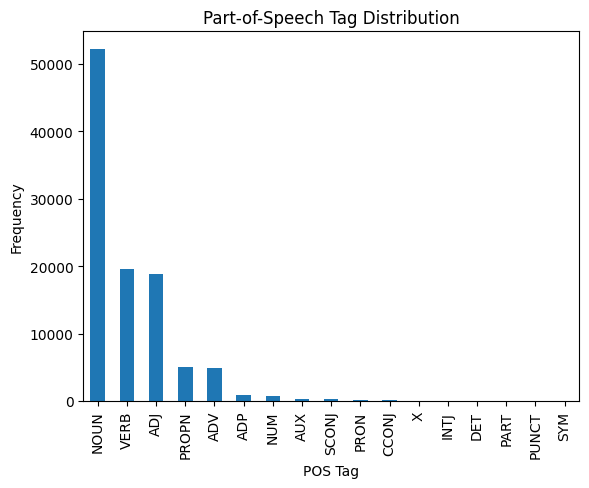

In [30]:
#POS Tag Visualization
import matplotlib.pyplot as plt

pos_counts.plot(kind="bar")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.title("Part-of-Speech Tag Distribution")
plt.show()

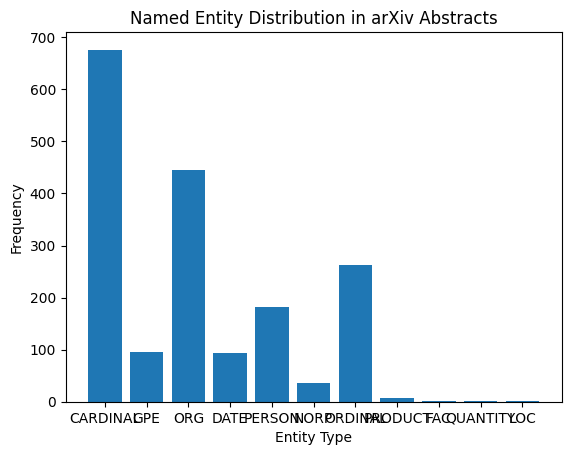

In [32]:
# Visualization
labels = list(entity_freq.keys())
counts = list(entity_freq.values())

plt.bar(labels, counts)
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Named Entity Distribution in arXiv Abstracts")
plt.show()

In [35]:
# merging
df = pd.read_csv(
    '/content/arxiv_data_210930-054931.csv',
    engine='python',
    nrows=1000
)[["abstracts"]].dropna()
df = df.reset_index(drop=True)
df["doc_id"] = df.index


# ---------- FUNCTIONS ----------
def tokenize(df):
    return pd.DataFrame({
        "doc_id": df["doc_id"],
        "tokenized": df["abstracts"].apply(word_tokenize)
    })

def remove_stopwords(token_df):
    sw = set(stopwords.words("english"))
    return pd.DataFrame({
        "doc_id": token_df["doc_id"],
        "filtered": token_df["tokenized"].apply(
            lambda w: [i.lower() for i in w if i.isalpha() and i.lower() not in sw]
        )
    })

def lemmatize(filtered_df):
    lem = WordNetLemmatizer()
    return pd.DataFrame({
        "doc_id": filtered_df["doc_id"],
        "lemmatized": filtered_df["filtered"].apply(
            lambda w: [lem.lemmatize(i) for i in w]
        )
    })

def rejoin(lemma_df):
    return pd.DataFrame({
        "doc_id": lemma_df["doc_id"],
        "clean_abstracts": lemma_df["lemmatized"].apply(lambda w: " ".join(w))
    })

def pos_tag(clean_df):
    rows = []
    for i, text in zip(clean_df["doc_id"], clean_df["clean_abstracts"]):
        doc = nlp(text)
        rows.append({
            "doc_id": i,
            "pos_tags": [(t.text, t.pos_) for t in doc]
        })
    return pd.DataFrame(rows)


# ---------- APPLY + MERGE ----------
merged_df = (
    df
    .merge(tokenize(df), on="doc_id")
    .merge(remove_stopwords(tokenize(df)), on="doc_id")
    .merge(lemmatize(remove_stopwords(tokenize(df))), on="doc_id")
    .merge(rejoin(lemmatize(remove_stopwords(tokenize(df)))), on="doc_id")
    .merge(pos_tag(rejoin(lemmatize(remove_stopwords(tokenize(df))))), on="doc_id")
)

merged_df.head()

,abstracts,doc_id,tokenized,filtered,lemmatized,clean_abstracts,pos_tags
0,Graph neural networks (GNNs) have been widely ...,0,"[Graph, neural, networks, (, GNNs, ), have, be...","[graph, neural, networks, gnns, widely, used, ...","[graph, neural, network, gnns, widely, used, l...",graph neural network gnns widely used learn ve...,"[(graph, PROPN), (neural, PROPN), (network, NO..."
1,Deep networks and decision forests (such as ra...,1,"[Deep, networks, and, decision, forests, (, su...","[deep, networks, decision, forests, random, fo...","[deep, network, decision, forest, random, fore...",deep network decision forest random forest gra...,"[(deep, ADJ), (network, NOUN), (decision, NOUN..."
2,Graph convolutional networks (GCNs) are powerf...,2,"[Graph, convolutional, networks, (, GCNs, ), a...","[graph, convolutional, networks, gcns, powerfu...","[graph, convolutional, network, gcns, powerful...",graph convolutional network gcns powerful tool...,"[(graph, NOUN), (convolutional, ADJ), (network..."
3,With the increasing popularity of Graph Neural...,3,"[With, the, increasing, popularity, of, Graph,...","[increasing, popularity, graph, neural, networ...","[increasing, popularity, graph, neural, networ...",increasing popularity graph neural network gnn...,"[(increasing, VERB), (popularity, NOUN), (grap..."
4,Machine learning solutions for pattern classif...,4,"[Machine, learning, solutions, for, pattern, c...","[machine, learning, solutions, pattern, classi...","[machine, learning, solution, pattern, classif...",machine learning solution pattern classificati...,"[(machine, NOUN), (learning, NOUN), (solution,..."


In [42]:
#by the pipeline method using functions
# =============== ALL OPERATIONS BY CALLING ONE FUNCTION ===============

import pandas as pd
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Load spaCy
nlp = spacy.load("en_core_web_sm")


def full_text_pipeline(filepath='/content/arxiv_data_210930-054931.csv', rows=1000):
    # Load data
    df = pd.read_csv(filepath, engine='python', nrows=rows)[["abstracts"]].dropna()
    df = df.reset_index(drop=True)
    df["doc_id"] = df.index

    # Tokenization
    token_df = pd.DataFrame({
        "doc_id": df["doc_id"],
        "tokenized": df["abstracts"].apply(word_tokenize)
    })

    # Stopword removal
    sw = set(stopwords.words("english"))
    stop_df = pd.DataFrame({
        "doc_id": token_df["doc_id"],
        "filtered": token_df["tokenized"].apply(
            lambda w: [i.lower() for i in w if i.isalpha() and i.lower() not in sw]
        )
    })

    # Lemmatization
    lem = WordNetLemmatizer()
    lemma_df = pd.DataFrame({
        "doc_id": stop_df["doc_id"],
        "lemmatized": stop_df["filtered"].apply(
            lambda w: [lem.lemmatize(i) for i in w]
        )
    })

    # Rejoin
    clean_df = pd.DataFrame({
        "doc_id": lemma_df["doc_id"],
        "clean_abstracts": lemma_df["lemmatized"].apply(lambda w: " ".join(w))
    })

    # POS tagging (spaCy)
    pos_df = pd.DataFrame({
        "doc_id": clean_df["doc_id"],
        "pos_tags": clean_df["clean_abstracts"].apply(
            lambda text: [(t.text, t.pos_) for t in nlp(text)]
        )
    })

    # Merge all
    final_df = (
        df
        .merge(token_df, on="doc_id")
        .merge(stop_df, on="doc_id")
        .merge(lemma_df, on="doc_id")
        .merge(clean_df, on="doc_id")
        .merge(pos_df, on="doc_id")
    )

    return final_df


# -------- FUNCTION CALL --------
result_df = full_text_pipeline(filepath='/content/arxiv_data_210930-054931.csv')
result_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,abstracts,doc_id,tokenized,filtered,lemmatized,clean_abstracts,pos_tags
0,Graph neural networks (GNNs) have been widely ...,0,"[Graph, neural, networks, (, GNNs, ), have, be...","[graph, neural, networks, gnns, widely, used, ...","[graph, neural, network, gnns, widely, used, l...",graph neural network gnns widely used learn ve...,"[(graph, PROPN), (neural, PROPN), (network, NO..."
1,Deep networks and decision forests (such as ra...,1,"[Deep, networks, and, decision, forests, (, su...","[deep, networks, decision, forests, random, fo...","[deep, network, decision, forest, random, fore...",deep network decision forest random forest gra...,"[(deep, ADJ), (network, NOUN), (decision, NOUN..."
2,Graph convolutional networks (GCNs) are powerf...,2,"[Graph, convolutional, networks, (, GCNs, ), a...","[graph, convolutional, networks, gcns, powerfu...","[graph, convolutional, network, gcns, powerful...",graph convolutional network gcns powerful tool...,"[(graph, NOUN), (convolutional, ADJ), (network..."
3,With the increasing popularity of Graph Neural...,3,"[With, the, increasing, popularity, of, Graph,...","[increasing, popularity, graph, neural, networ...","[increasing, popularity, graph, neural, networ...",increasing popularity graph neural network gnn...,"[(increasing, VERB), (popularity, NOUN), (grap..."
4,Machine learning solutions for pattern classif...,4,"[Machine, learning, solutions, for, pattern, c...","[machine, learning, solutions, pattern, classi...","[machine, learning, solution, pattern, classif...",machine learning solution pattern classificati...,"[(machine, NOUN), (learning, NOUN), (solution,..."
